# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.

# Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modificatoin notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-09-10 07:15:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   120MB/s    in 0.9s    

2025-09-10 07:15:05 (120 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (bocome one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer visoin project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak/

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
from posixpath import dirname
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


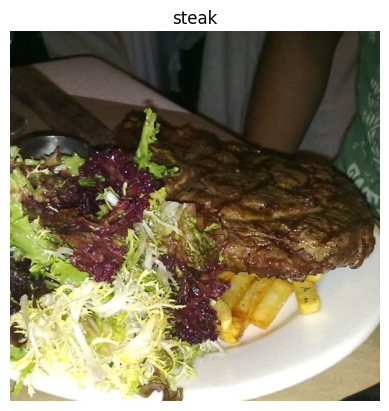

In [9]:
# View a randomg image from the trainning dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

In [10]:
# The images we've imported and plotted are actually gaint arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 20,  25,  21],
        [ 20,  25,  21],
        [ 20,  25,  21],
        ...,
        [ 37,  51,  34],
        [ 37,  54,  35],
        [ 36,  53,  34]],

       [[ 22,  27,  23],
        [ 22,  27,  23],
        [ 23,  28,  24],
        ...,
        [ 36,  50,  33],
        [ 35,  52,  33],
        [ 35,  52,  33]],

       [[ 25,  30,  26],
        [ 25,  30,  26],
        [ 27,  32,  28],
        ...,
        [ 35,  49,  32],
        [ 33,  50,  32],
        [ 36,  53,  35]],

       ...,

       [[183, 166, 112],
        [186, 169, 117],
        [187, 170, 118],
        ...,
        [ 28,  33,  27],
        [ 27,  32,  26],
        [ 27,  32,  26]],

       [[188, 167, 120],
        [191, 170, 123],
        [190, 172, 126],
        ...,
        [ 27,  32,  26],
        [ 27,  32,  26],
        [ 27,  32,  26]],

       [[186, 164, 123],
        [189, 167, 126],
        [190, 168, 127],
        ...,
        [ 26,  31,  2

In [11]:
# View the image shape
img.shape # returns width, hight, color channels

(512, 512, 3)

🔑 **Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing stes for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [12]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.07843137, 0.09803922, 0.08235294],
        [0.07843137, 0.09803922, 0.08235294],
        [0.07843137, 0.09803922, 0.08235294],
        ...,
        [0.14509804, 0.2       , 0.13333333],
        [0.14509804, 0.21176471, 0.1372549 ],
        [0.14117647, 0.20784314, 0.13333333]],

       [[0.08627451, 0.10588235, 0.09019608],
        [0.08627451, 0.10588235, 0.09019608],
        [0.09019608, 0.10980392, 0.09411765],
        ...,
        [0.14117647, 0.19607843, 0.12941176],
        [0.1372549 , 0.20392157, 0.12941176],
        [0.1372549 , 0.20392157, 0.12941176]],

       [[0.09803922, 0.11764706, 0.10196078],
        [0.09803922, 0.11764706, 0.10196078],
        [0.10588235, 0.1254902 , 0.10980392],
        ...,
        [0.1372549 , 0.19215686, 0.1254902 ],
        [0.12941176, 0.19607843, 0.1254902 ],
        [0.14117647, 0.20784314, 0.1372549 ]],

       ...,

       [[0.71764706, 0.65098039, 0.43921569],
        [0.72941176, 0.6627451 , 0.45882353],
        [0.73333333, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more speciically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# It found 1500 images belonging to 2 classes
# and found 500 images beloning to 2 classes as well.
# while the train_data length is 47 len(train_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation=tf.keras.activations.relu,
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # binary activation output
])

# Compile the model
model_1.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.5959 - loss: 0.6493 - val_accuracy: 0.8200 - val_loss: 0.4095
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7968 - loss: 0.4509 - val_accuracy: 0.8480 - val_loss: 0.3353
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8182 - loss: 0.3975 - val_accuracy: 0.8280 - val_loss: 0.3855
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8479 - loss: 0.3600 - val_accuracy: 0.8580 - val_loss: 0.3204
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.8804 - loss: 0.3075 - val_accuracy: 0.8480 - val_loss: 0.3379


In [16]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

> 📖 **CNN explainer website** https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous sectin to see if it works with our image data.

The model we're building is from the [TnesorFlow palygroud](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.69764&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [17]:
# Set reandom seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playround model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_2.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.4990 - loss: 1.0671 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.4972 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.4926 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5056 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.4701 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [19]:
# Set reandom seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playround model
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_3.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.5469 - loss: 11.4726 - val_accuracy: 0.6720 - val_loss: 1.4857
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.6912 - loss: 0.9936 - val_accuracy: 0.7900 - val_loss: 0.4605
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7627 - loss: 0.5510 - val_accuracy: 0.7840 - val_loss: 0.4853
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.7498 - loss: 0.5341 - val_accuracy: 0.7020 - val_loss: 0.8363
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6852 - loss: 0.8553 - val_accuracy: 0.7980 - val_loss: 0.4460


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

> 🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turnin our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (436, 512, 3)
Image shape: (512, 384, 3)


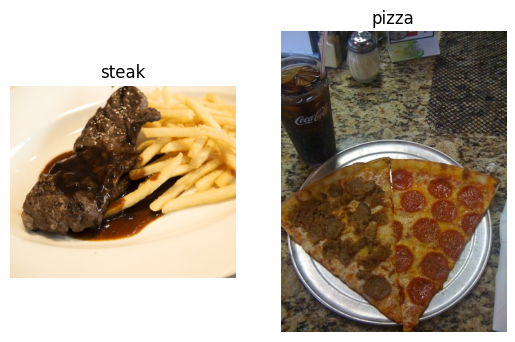

In [21]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/",
                              "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/",
                              "pizza")

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Deine directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **Batches**

A **Batches** is a samll subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of you processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

https://x.com/ylecun/status/989610208497360896

In [23]:
!nvidia-smi

Wed Sep 10 07:18:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P0             31W /   70W |    1178MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and trun them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,    # Target direcotry of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               batch_size=32,          # type of data you're working with
                                               class_mode="binary",    # size of minibatches to load data into
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch
images, labels = next(train_data) # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [27]:
# How many betches are there?
len(train_data)

47

In [28]:
1500/32

46.875

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.14117648, 0.16862746, 0.19215688],
          [0.10588236, 0.13333334, 0.17254902],
          [0.1137255 , 0.1254902 , 0.18431373],
          ...,
          [0.0509804 , 0.03921569, 0.08235294],
          [0.0509804 , 0.03529412, 0.09019608],
          [0.04705883, 0.03137255, 0.08627451]],
 
         [[0.11764707, 0.12941177, 0.14901961],
          [0.09411766, 0.09411766, 0.14117648],
          [0.09411766, 0.09019608, 0.14509805],
          ...,
          [0.0509804 , 0.03921569, 0.08235294],
          [0.0509804 , 0.03529412, 0.09019608],
          [0.0509804 , 0.03529412, 0.09019608]],
 
         [[0.14117648, 0.14117648, 0.14901961],
          [0.1137255 , 0.10980393, 0.14117648],
          [0.08627451, 0.07843138, 0.12156864],
          ...,
          [0.04705883, 0.03529412, 0.07843138],
          [0.0509804 , 0.03529412, 0.09019608],
          [0.0509804 , 0.03529412, 0.09019608]],
 
         ...,
 
         [[0.53333336, 0.6627451 , 0.7843138 ],
          [0.54117

In [33]:
# Get the first batch of labels
labels

array([1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

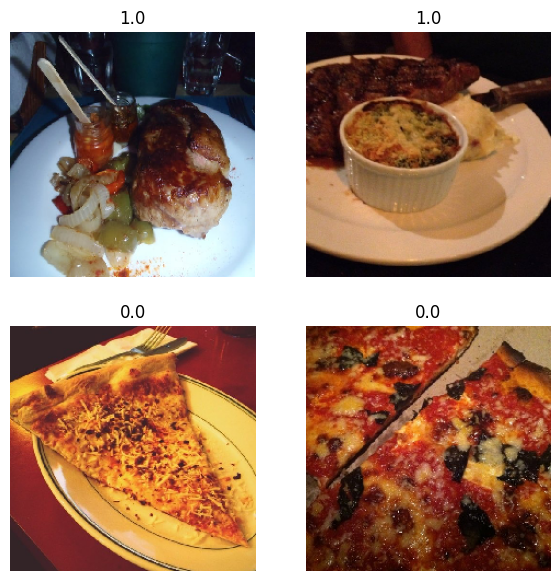

In [50]:
# Show four image and its labels
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  plt.imshow(images[i])
  plt.axis("off")
  plt.title(labels[i])


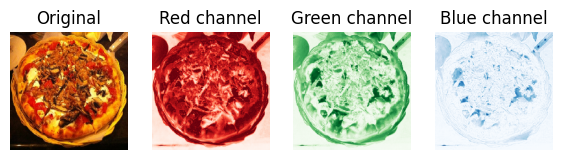

In [53]:
import matplotlib.pyplot as plt
import random

# pick a random image from the batch
rand_index = random.choice(range(len(images)))
image = images[rand_index]

# show original image
plt.figure(figsize=(7, 7))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

# show Red channel
plt.subplot(1,4,2)
plt.imshow(image[:,:,0], cmap='Reds')
plt.title("Red channel")
plt.axis("off")

# show Green channel
plt.subplot(1,4,3)
plt.imshow(image[:,:,1], cmap='Greens')
plt.title("Green channel")
plt.axis("off")

# show Blue channel
plt.subplot(1,4,4)
plt.imshow(image[:,:,2], cmap='Blues')
plt.title("Blue channel")
plt.axis("off")

plt.show()


### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is start with a something simple and see if works on your data then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [47]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import BinaryCrossentropy

In [48]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Input(shape=(244, 244, 3)),        # input layer (specify input shape)
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation=relu),
    Conv2D(10, 3, activation=relu),
    Conv2D(10, 3, activation=relu),
    Flatten(),
    Dense(1, activation=sigmoid)       # output layer (working with binary classification so only 1 output neuran)
])